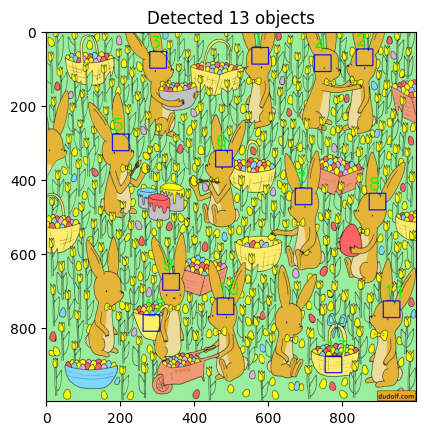

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def is_too_close(new_point, existing_points, min_distance):
    for point in existing_points:
        dist = np.sqrt((new_point[0] - point[0]) ** 2 + (new_point[1] - point[1]) ** 2)
        if dist < min_distance:
            return True
    return False

def counting(img, template, THRESHOLD, min_distance=20, font_scale=1.0):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    w, h = template.shape[1], template.shape[0]
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

    loc = np.where(res >= THRESHOLD)
    detected_points = []

    # Draw bounding box and add numbering
    for idx, (y, x) in enumerate(zip(loc[0], loc[1])):
        # Check if the point is too close to existing points
        if not is_too_close((x, y), detected_points, min_distance):
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            # Add numbering on top of the rectangle with larger font size
            cv2.putText(img, str(len(detected_points) + 1), (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2, cv2.LINE_AA)
            detected_points.append((x, y))  # Keep track of the detected points

    # Display result
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    cv2.imwrite("imgs/outputs/rabbit_solution_2.jpg", img)
    plt.title(f"Detected {len(detected_points)} objects")
    plt.show()

# Load images
image = cv2.imread("imgs/root_img/rabbit1.jpeg")
template = cv2.imread("imgs/template/rabbit.jpeg")

# Call counting function with larger font scale
counting(image, template, THRESHOLD=0.26, min_distance=100, font_scale=1.5)